In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
nx = [11, 51, 101]   # Number of points in space
nt = 100  # Number of points in time
dt = 0.01  # Time interval (step in time)
dx = [2 / (nx[i] - 1) for i in range(len(nx))]  # Space interval (size of a slice)
c = 1  # Wave speed

# Initial conditions
x = [np.linspace(0, 2, n) for n in nx]
u = [np.ones(n) for n in nx]
for i in range(len(u)):
    u[i][(0.5 <= x[i]) & (x[i] <= 1)] = 2 

# Store the initial condition for plotting
u_values = [[u[i].copy()] for i in range(len(u))]

# Time-stepping loop
for i in range(len(u_values)):
    for t in range(nt):
        un = u[i].copy()
        for j in range(1, nx[i]):
            u[i][j] = un[j] - c * dt / dx[i] * (un[j] - un[j-1])
        
        # Store the current state for plotting
        u_values[i].append(u[i].copy())

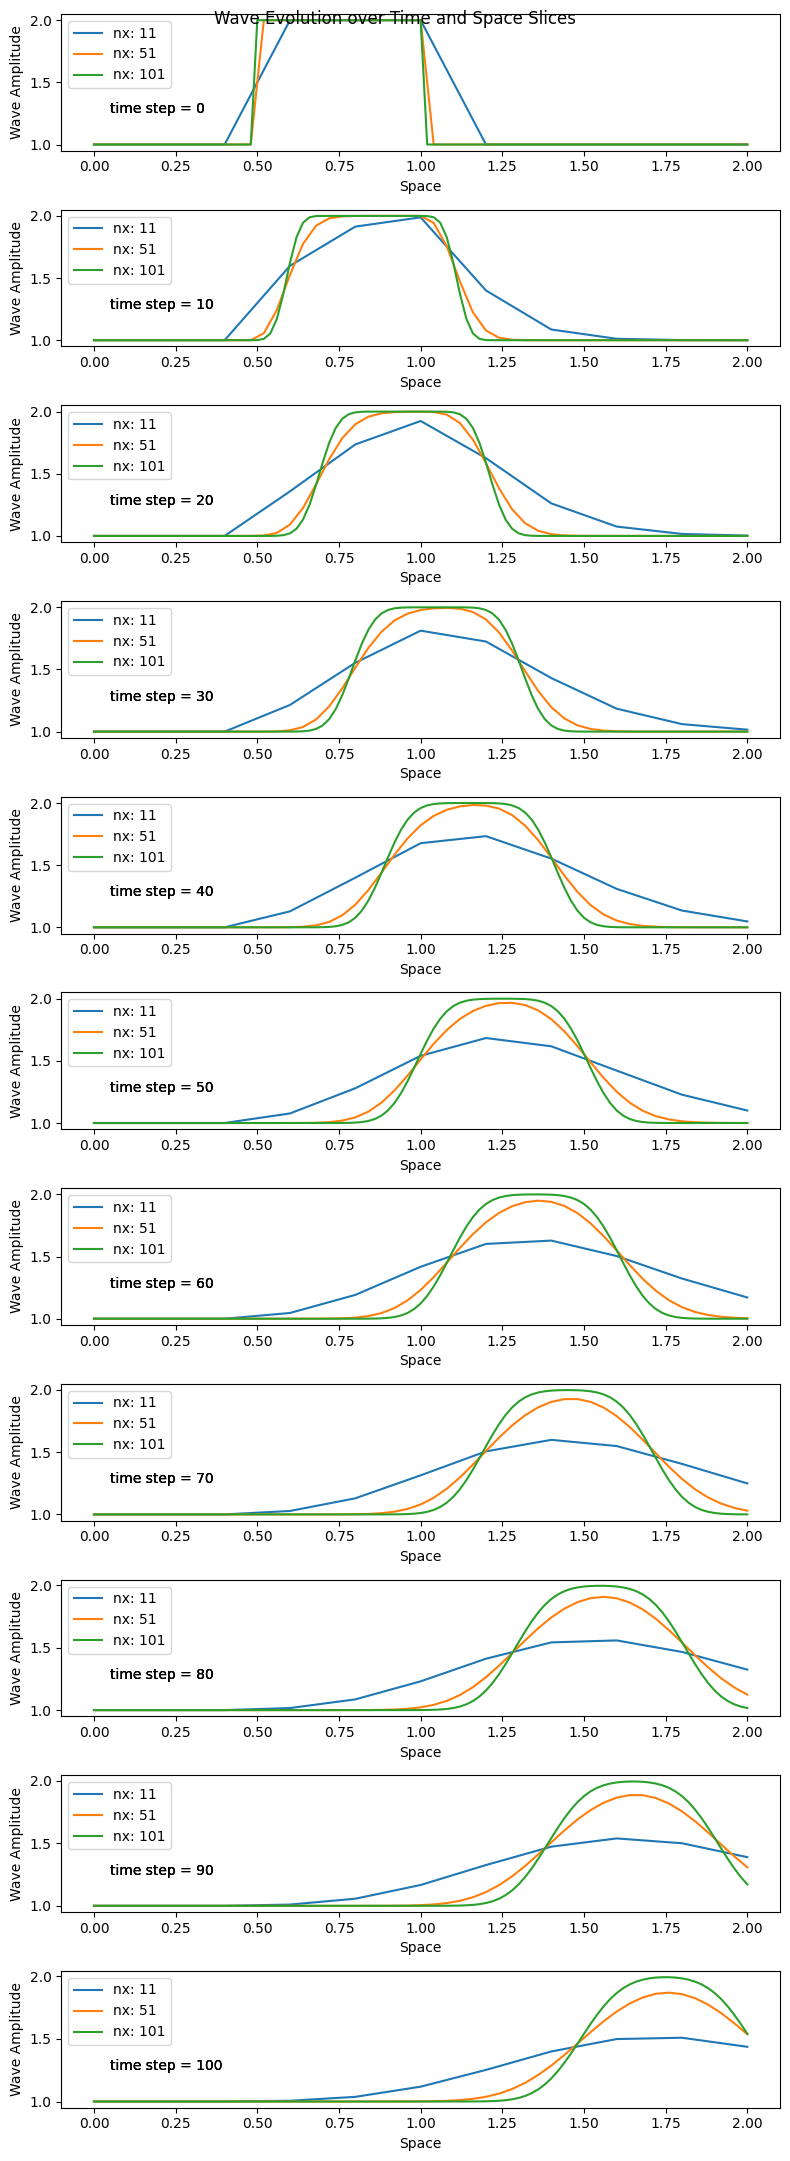

In [5]:
# Create a plot to visualize the evolution over time and space slices
fig, axes = plt.subplots(nt//10 + 1, 1, figsize=(8, 2*(nt//10 + 1)))
fig.suptitle('Wave Evolution over Time and Space Slices')
for i in range(len(u_values)):
    for j, ax in enumerate(axes):
        t_step = j * 10
        ax.plot(x[i], u_values[i][t_step], label=f'nx: {len(x[i])}')
        ax.legend(loc='upper left')
        ax.text(0.05, 1.25, f'time step = {t_step}')
        ax.set_xlabel('Space')
        ax.set_ylabel('Wave Amplitude')
        
plt.tight_layout(rect=[0, 0, 1, 1])
plt.show()